# Load and Sample the Dataset
<p>Your task is to dive deep into the Fashion MNIST dataset and gather insights about the data. Start by loading the dataset. Sample 10% of the training and test sets. After loading, retrieve and display the shape of both the training and test datasets.</p>

In [1]:
#Import necessary libraries:

# Import TensorFlow and NumPy
import tensorflow as tf
import numpy as np

In [2]:
#Load the Fashion MNIST dataset:

# Load Fashion MNIST dataset
fashion_mnist = tf.keras.datasets.fashion_mnist
(x_train_total, y_train_total), (x_test_total, y_test_total) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 1s 0us/step


In [3]:
# Import the train and test split function from sklearn:

from sklearn.model_selection import train_test_split

In [4]:
# Take only 10% of the data:

# Extract a 10% sample from the training dataset
x_train, _, y_train, _ = train_test_split(x_train_total, 
                                          y_train_total, 
                                          test_size=0.9, 
                                          random_state=1502)
 
# Extract a 10% sample from the test dataset
x_test, _, y_test, _ = train_test_split(x_test_total, 
                                        y_test_total, 
                                        test_size=0.9, 
                                        random_state=1502)

In [5]:
# Print the shapes of the training and testing datasets:

# Display the shape of training and testing data
print(f"Training dataset shape: {x_train.shape}")
print(f"Training labels shape: {y_train.shape}")
print(f"Testing dataset shape: {x_test.shape}")
print(f"Testing labels shape: {y_test.shape}")

Training dataset shape: (6000, 28, 28)
Training labels shape: (6000,)
Testing dataset shape: (1000, 28, 28)
Testing labels shape: (1000,)


# Detailed Visual Analysis of Dataset
<div data-purpose="safely-set-inner-html:rich-text-viewer:html" class="lab-rich-text-viewer--lab-html-content--22XsM rt-scaffolding"><p>The Fashion MNIST dataset is a collection of grayscale images of various fashion articles and accessories. The dataset consists of 10 unique categories. Your objective as a data analyst is to provide a detailed visual analysis:</p><p><strong>Random Image Visualization:</strong> For each of the 10 fashion categories ("T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"), randomly select and display an image. This step is crucial to familiarize yourself with the visual nuances of each category.</p><p><strong>Class Distribution Analysis:</strong> Investigate the distribution of the 10 categories within the dataset using a histogram. This will help determine if the dataset is balanced, meaning it has an equal number of images from each category, or if some categories are over or underrepresented.</p></div>

In [6]:
# Define the class labels of the Fashion MNIST dataset

# Define the class names corresponding to the labels in the dataset
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
               "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

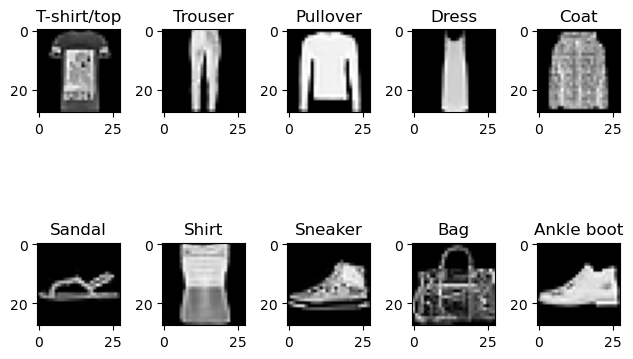

In [7]:
# Display random images from each of the fashion categories

import matplotlib.pyplot as plt
 
# Loop through each fashion category
for i in range(10):
    # Randomly select an image index corresponding to the current fashion category
    idx = np.random.choice(np.where(y_train == i)[0])
    
    # Plot the image
    plt.subplot(2, 5, i+1)
    plt.imshow(x_train[idx], cmap='gray')
    plt.title(class_names[i])
plt.tight_layout()
plt.show()


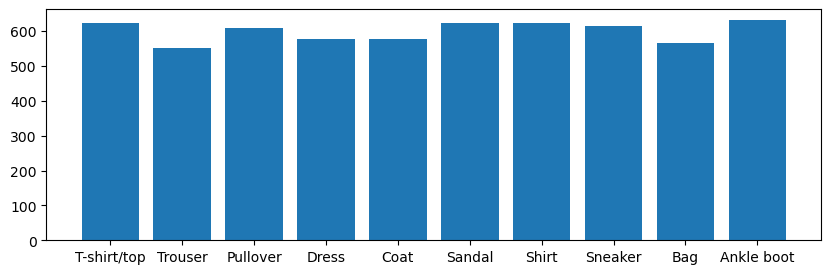

In [8]:
# Visualize the distribution of fashion categories in the dataset

# Create a histogram to display the count of images per fashion category
plt.figure(figsize=(10,3))
plt.hist(y_train, bins=np.arange(11)-0.5, rwidth=0.8)
plt.xticks(np.arange(10), class_names)
plt.show()

# Preprocessing the Dataset for Neural Network Efficiency
<p>In this task, the primary objective is to refine and adapt the Fashion MNIST dataset to ensure it's ideally suited for deep learning operations. Begin with a normalization process, transforming the grayscale pixel intensities, which originally range from 0 to 255, to a more neural network-friendly scale of 0-1. Following this, reshape the dataset, adding an essential channel dimension. This step ensures the data aligns perfectly with the structural needs of Convolutional Neural Networks, paving the way for efficient and effective training sessions.</p>

In [9]:
# Normalize the training and testing datasets:

# Normalize the pixel values to the range [0,1]
x_train = x_train / 255.0
x_test = x_test / 255.0

In [10]:
# Adjust the shape of datasets to encompass the channel dimension:

# Alter the data shape to be (number of samples, height, width, number of channels)
x_train = x_train.reshape((-1, 28, 28, 1))
x_test = x_test.reshape((-1, 28, 28, 1))

# Image Data Augmentation for Model Performance Enhancement
<div data-purpose="safely-set-inner-html:rich-text-viewer:html" class="lab-rich-text-viewer--lab-html-content--22XsM rt-scaffolding"><p>To ensure our model can handle various image scenarios and is not restricted to the nuances of our initial dataset, implement a data augmentation process using TensorFlow's <code><strong>ImageDataGenerator</strong></code>. The modifications to be incorporated are:</p><ul><li><p><strong>Rotation:</strong> Up to 10 degrees.</p></li><li><p><strong>Zoom:</strong> A maximum of 10%.</p></li><li><p><strong>Shear:</strong> By 0.1 factor.</p></li><li><p><strong>Width Shift:</strong> Up to 10%.</p></li><li><p><strong>Height Shift:</strong> Up to 10%.</p></li><li><p><strong>Flipping:</strong> Horizontal flipping permitted.</p></li></ul></div>

In [11]:
# Set up the ImageDataGenerator using the given parameters to alter the image data as specified.

# Initializing the ImageDataGenerator with the desired augmentations
datagen = tf.keras.preprocessing.image.ImageDataGenerator(
   rotation_range=10,      # Rotate images up to 10 degrees
   zoom_range=0.1,         # Zoom in on images up to 10%
   shear_range=0.1,        # Shear images by a factor of 0.1
   width_shift_range=0.1,  # Shift the width of images up to 10%
   height_shift_range=0.1, # Shift the height of images up to 10%
   horizontal_flip=True    # Allow horizontal flipping of images
)

In [12]:
# Implement the defined augmentations to the main training dataset.

# Apply the defined data augmentations to the training set
datagen.fit(x_train)

# Construct and Train a Convolutional Neural Network (CNN) for Image Classification
<div data-purpose="safely-set-inner-html:rich-text-viewer:html" class="lab-rich-text-viewer--lab-html-content--22XsM rt-scaffolding"><p>Develop a Convolutional Neural Network (CNN) for classifying images from the fashion dataset. Your CNN model must be structured as follows:</p><ul><li><p><strong>Initial Convolutional Layer</strong>: 32 filters, a 3x3 kernel, and 'relu' activation.</p></li><li><p><strong>Pooling Layer</strong>: A 2x2 pooling matrix.</p></li><li><p><strong>Dropout Layer</strong>: 20% dropout rate.</p></li><li><p><strong>Second Convolutional Layer</strong>: 64 filters, a 3x3 kernel, and 'relu' activation.</p></li><li><p><strong>Second Pooling Layer</strong>: A 2x2 pooling matrix.</p></li><li><p><strong>Dropout Layer</strong>: 20% dropout rate.</p></li><li><p><strong>Flattening Layer</strong>.</p></li><li><p><strong>Dense Layer</strong>: 256 units with 'relu' activation.</p></li><li><p><strong>Dropout Layer</strong>: 50% dropout rate.</p></li><li><p><strong>Final Dense Layer</strong>: 10 units with 'softmax' activation.</p></li></ul><p>Compile the network using the Adam optimizer, 'sparse_categorical_crossentropy' loss function, and monitor the 'accuracy' metric. Train your model for 5 epochs using a batch size of 32, leveraging the augmented training data and validating against the test dataset.</p><p><br></p></div>

In [13]:
# Start by importing the necessary TensorFlow libraries.

# Importing required modules from TensorFlow
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

In [14]:
# Construct the CNN using the specified architecture.

# Defining the CNN architecture with the provided specifications
model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(28, 28, 1)),  # First convolutional layer
    MaxPooling2D(2, 2),                                             # First pooling layer
    Dropout(0.2),                                                   # 20% dropout layer
    Conv2D(64, (3,3), activation='relu'),                           # Second convolutional layer
    MaxPooling2D(2, 2),                                             # Second pooling layer
    Dropout(0.2),                                                   # 20% dropout layer
    Flatten(),                                                      # Flattening layer
    Dense(256, activation='relu'),                                  # Dense layer with 256 units
    Dropout(0.5),                                                   # 50% dropout layer
    Dense(10, activation='softmax')                                 # Output layer with 10 units
])

In [15]:
# Compile the CNN model with the appropriate parameters.

# Compiling the model with the Adam optimizer and suitable loss function
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [16]:
# Proceed to train the model using the augmented dataset.

# Training the model with augmented data and validating on the test set
history = model.fit(datagen.flow(x_train,
                                 y_train,
                                 batch_size=32),
                    epochs=5,
                    validation_data=(x_test,
                                     y_test))


Epoch 1/5


2024-02-05 00:10:18.053895: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]
2024-02-05 00:10:18.084353: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


188/188 [==============================] - 2s 9ms/step - loss: 1.3147 - accuracy: 0.5185 - val_loss: 0.7437 - val_accuracy: 0.7150
Epoch 2/5
188/188 [==============================] - 2s 10ms/step - loss: 0.8751 - accuracy: 0.6773 - val_loss: 0.6485 - val_accuracy: 0.7340
Epoch 3/5
188/188 [==============================] - 2s 10ms/step - loss: 0.7878 - accuracy: 0.7030 - val_loss: 0.6281 - val_accuracy: 0.7480
Epoch 4/5
188/188 [==============================] - 2s 10ms/step - loss: 0.7469 - accuracy: 0.7145 - val_loss: 0.5794 - val_accuracy: 0.7660
Epoch 5/5
188/188 [==============================] - 2s 10ms/step - loss: 0.7096 - accuracy: 0.7303 - val_loss: 0.5584 - val_accuracy: 0.7720


# Implement Advanced Training Techniques for CNN
<div data-purpose="safely-set-inner-html:rich-text-viewer:html" class="lab-rich-text-viewer--lab-html-content--22XsM rt-scaffolding"><p>Optimize the training process of your previously constructed Convolutional Neural Network by introducing early stopping and dynamic learning rate adjustments. Implement the following strategies:</p><ul><li><p><strong>Early Stopping</strong>: Monitor the 'val_accuracy' metric and halt training if no improvement is observed after 5 consecutive epochs.</p></li><li><p><strong>Learning Rate Scheduler</strong>: Maintain the current learning rate for the first 10 epochs. For epochs beyond the 10th, reduce the learning rate by a factor of 0.1.</p></li></ul><p>Train your CNN model for a total of 20 epochs, ensuring that you use these callback strategies to halt training early if necessary and dynamically adjust the learning rate during the training process. Note that the number of epochs might change.</p><p><br></p></div>

In [18]:
# Set up the Early Stopping callback.

# Implementing early stopping based on validation accuracy
early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_accuracy',
                                              patience=5)


In [19]:
# Define the custom learning rate scheduler function.

# Defining the learning rate schedule function
def lr_schedule(epoch, lr):
    if epoch > 10:
        return lr * 0.1  # Reduce learning rate by a factor of 0.1 after 10 epochs
    return lr


In [20]:
# Initialize the Learning Rate Scheduler callback using the custom function.

# Initializing the learning rate scheduler callback
scheduler = tf.keras.callbacks.LearningRateScheduler(lr_schedule)

In [21]:
# Train the model using both callbacks.

# Training the CNN model with augmented data, using the callbacks for early stopping and learning rate scheduling
history = model.fit(datagen.flow(x_train,
                                 y_train,
                                 batch_size=32),
                    epochs=20,
                    validation_data=(x_test,
                                     y_test),
                    callbacks=[early_stop, scheduler])

Epoch 1/20
 19/188 [==>...........................] - ETA: 1s - loss: 0.6452 - accuracy: 0.7703

2024-02-05 00:11:14.921302: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


188/188 [==============================] - 2s 10ms/step - loss: 0.6735 - accuracy: 0.7402 - val_loss: 0.5393 - val_accuracy: 0.7900 - lr: 0.0010
Epoch 2/20
188/188 [==============================] - 2s 10ms/step - loss: 0.6617 - accuracy: 0.7450 - val_loss: 0.5255 - val_accuracy: 0.7950 - lr: 0.0010
Epoch 3/20
188/188 [==============================] - 2s 10ms/step - loss: 0.6445 - accuracy: 0.7522 - val_loss: 0.5005 - val_accuracy: 0.7980 - lr: 0.0010
Epoch 4/20
188/188 [==============================] - 2s 10ms/step - loss: 0.6138 - accuracy: 0.7585 - val_loss: 0.4828 - val_accuracy: 0.8080 - lr: 0.0010
Epoch 5/20
188/188 [==============================] - 2s 10ms/step - loss: 0.6059 - accuracy: 0.7713 - val_loss: 0.5033 - val_accuracy: 0.7870 - lr: 0.0010
Epoch 6/20
188/188 [==============================] - 2s 11ms/step - loss: 0.5818 - accuracy: 0.7688 - val_loss: 0.4689 - val_accuracy: 0.8140 - lr: 0.0010
Epoch 7/20
188/188 [==============================] - 2s 11ms/step - loss: 

# Evaluate Model Performance and Visualize Misclassifications
<div data-purpose="safely-set-inner-html:rich-text-viewer:html" class="lab-rich-text-viewer--lab-html-content--22XsM rt-scaffolding"><p>Evaluate the performance of the trained Convolutional Neural Network on the training and testing datasets. Implement the subsequent evaluation steps:</p><ul><li><p>Plot the accuracy curves for the training and testing datasets.</p></li><li><p>Plot the loss curves for the training and testing datasets.</p></li><li><p>Construct a confusion matrix to analyze the true labels versus the predicted labels for the testing dataset.</p></li><li><p>Visualize the confusion matrix to visually represent misclassifications.</p></li></ul></div>

In [22]:
# Start by importing necessary visualization and matrix evaluation libraries.

from sklearn.metrics import confusion_matrix
import seaborn as sns


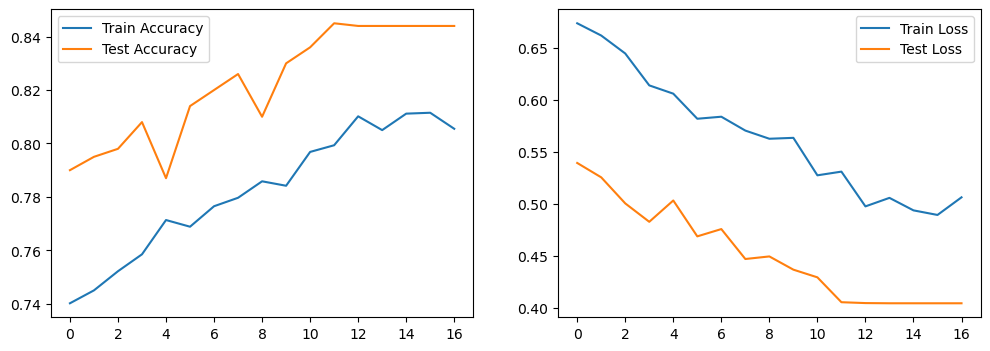

In [23]:
# Plot the accuracy curves for both the training and testing data to evaluate the model's performance during training epochs. Use a similar approach to visualize how the model's loss has changed over the training epochs.

# Setting up the figure for plotting
plt.figure(figsize=(12, 4))
 
# Plotting the accuracy curve for training and testing data
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Test Accuracy')
plt.legend()
 
# Plotting the loss curve for training and testing data
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Test Loss')
plt.legend()
 
# Displaying the accuracy plot
plt.show()

In [24]:
# Generate a confusion matrix using the true labels from the test data and the predicted labels from the model.

# Predicting labels for the testing dataset
y_pred = model.predict(x_test)
 
# Generating the confusion matrix
cm = confusion_matrix(y_test, np.argmax(y_pred, axis=1))


32/32 [==============================] - 0s 3ms/step


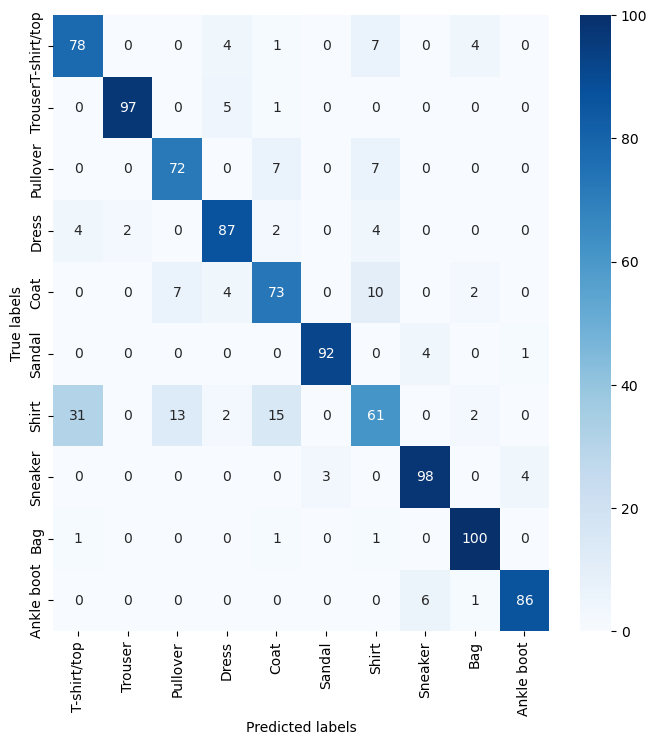

In [25]:
# Utilize a heatmap to visually present the confusion matrix, ensuring to include annotations for clarity.

# Setting up the figure for the heatmap
plt.figure(figsize=(8,8))
 
# Visualizing the confusion matrix using a heatmap
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
 
# Displaying the confusion matrix plot
plt.show()

# Development of a Grad-CAM Heatmap Function for Deep Learning Model Interpretability

<p>The goal of this task is to develop and implement a robust function, termed <code><strong>make_gradcam_heatmap</strong></code>, which produces a Grad-CAM heatmap. This heatmap will serve as a visual representation of how much various parts of an input image influenced a deep learning model's predictions. Such visual tools help in understanding and interpreting the decisions made by deep neural networks, particularly in cases where the reasons behind certain predictions need to be clear and justifiable.</p>

In [28]:
# Start by naming the function, the inputs and writing the documentation.
# Acquire the desired convolutional layer from the model and construct a new model that maps the original input to this layer's activations.
# Determine the index or position of our target layer within the model's architecture.
# Establish a separate model that processes the activations of our target layer and yields the model's ultimate class predictions.
# Utilize TensorFlow's gradient tracking mechanism to monitor the activations and compute the classification scores.
# Compute the gradient that represents the importance of each feature in the convolutional layer's activations with respect to the target class score.
# Generate the heatmap by weighing the activations by their respective importance, and then normalize it to ensure values lie between 0 and 1.


def make_gradcam_heatmap(img_array, model, last_conv_layer_name, pred_index=None):
    """
    Generate a GradCAM heatmap for a given image array.
    
    Args:
    - img_array (numpy.ndarray): The input image array.
    - model (tf.keras.Model): The pre-trained model.
    - last_conv_layer_name (str): The name of the last convolutional layer in the model.
    - pred_index (int, optional): The index of the prediction class. Uses top prediction if None.
    
    Returns:
    - numpy.ndarray: The GradCAM heatmap.
    """
    # Obtain the last convolutional layer from the model
    last_conv_layer = model.get_layer(last_conv_layer_name)
 
    # Create a model that maps the model's input to the last_conv_layer's output
    last_conv_layer_model = tf.keras.Model(model.inputs, last_conv_layer.output)
 
 
    # Get the index of the specified convolutional layer in the model
    last_conv_layer_idx = [layer.name for layer in model.layers].index(last_conv_layer_name)
 
 
    # Create an input placeholder with the shape of the output from last_conv_layer
    classifier_input = tf.keras.Input(shape=last_conv_layer.output.shape[1:])
    x = classifier_input
 
    # Loop through layers after the last_conv_layer and build the classifier model
    for layer in model.layers[last_conv_layer_idx+1:]:
        x = layer(x)
    classifier_model = tf.keras.Model(classifier_input, x)
 
    # Set up the GradientTape for automatic differentiation
    with tf.GradientTape() as tape:
        # Compute the activations of the last convolutional layer
        last_conv_layer_output = last_conv_layer_model(img_array)
        # Make sure TensorFlow watches this output for gradient calculations
        tape.watch(last_conv_layer_output)
        # Predict the class scores using the classifier model
        preds = classifier_model(last_conv_layer_output)
        # If no specific class index is provided, use the class with the highest score
        if pred_index is None:
            pred_index = tf.argmax(preds[0])
        # Extract the score for the target class
        class_channel = preds[:, pred_index]
 
    # Calculate the gradient of the target class score with respect to the activations
    grads = tape.gradient(class_channel, last_conv_layer_output)
 
    # Average the gradients spatially (over height and width) to get the importance of each feature map
    pooled_grads = tf.reduce_mean(grads, axis=(0, 1, 2))
 
 
    # Weigh the activations by the importance to get the heatmap
    last_conv_layer_output = last_conv_layer_output * pooled_grads[tf.newaxis, tf.newaxis, tf.newaxis, :]
 
    # Average over the feature maps to get a 2D heatmap
    heatmap = tf.reduce_mean(last_conv_layer_output, axis=-1)[0]
    
    # Normalize the heatmap to lie between 0 and 1
    heatmap = np.maximum(heatmap, 0) / np.max(heatmap)
 
    return heatmap


# Generate and Display a GradCAM Heatmap Overlay for a Random Test Image
<p>For this task, you are to visually represent where the neural network model, specified by the <code><strong>model</strong></code> parameter, is focusing its attention while predicting an image from the test set <code><strong>x_test</strong></code>. The GradCAM technique you'll utilize helps in discerning which regions of an image most influenced the model's prediction.</p>

In [29]:
# Enumerate and print the names of all layers in the model.

# Iterate over all the layers in the model and print their names
for layer in model.layers:
    print(layer.name)

conv2d
max_pooling2d
dropout
conv2d_1
max_pooling2d_1
dropout_1
flatten
dense
dropout_2
dense_1


In [30]:
# Randomly pick an image from x_test.

# Select a random image from the test dataset
img_array = x_test[np.random.choice(x_test.shape[0])]
 
# Reshape the image to add an extra dimension for batch size
img_array = img_array[np.newaxis, :]


In [31]:
# Predict the class of the chosen image.

# Get the model's predictions for the selected image
preds = model.predict(img_array)
 
# Determine the index of the class with the highest prediction score
top_pred_index = np.argmax(preds[0])

1/1 [==============================] - 0s 17ms/step


In [32]:
# Use the make_gradcam_heatmap function to produce the heatmap.

# Generate the GradCAM heatmap for the image based on the specified layer and prediction
heatmap = make_gradcam_heatmap(img_array, model, 'conv2d', top_pred_index)


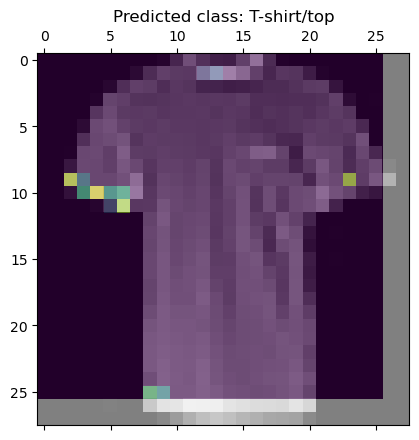

In [33]:
# Visualize the heatmap and the original image together.

# Display the heatmap
plt.matshow(heatmap)
 
# Overlay the original image and heatmap
plt.imshow(img_array.reshape(28, 28), cmap='gray', alpha=0.5)
 
# Title the visualization with the model's top prediction
plt.title(f"Predicted class: {class_names[top_pred_index]}")
 
plt.show()


# Save, Deploy and Display the Model

<p>You are tasked with overseeing the post-training phase of our neural network model. Initiate by ensuring the model's preservation in our designated format, safeguarding both its structure and learned weights. Post storage, retrieve the model into our working environment. Once successfully imported, test its efficacy: select an image at random from our test dataset. Deploy the model for predictions on this image, and subsequently, illustrate the result visually, ensuring it provides clarity on the model's decision-making process. This demonstration will validate our model's robustness and readiness for deployment.</p>

In [34]:
# Begin by saving the model in the native Keras format.

# Save the model
model.save("cnn_model.keras")


In [35]:
# Load the saved model back into the environment.

# Load the model
loaded_model = tf.keras.models.load_model("cnn_model.keras")


In [36]:
# Randomly select an image from the test dataset x_test.

# Predict on a random test image
random_idx = np.random.choice(len(x_test))
test_img = x_test[random_idx]


1/1 [==============================] - 0s 38ms/step


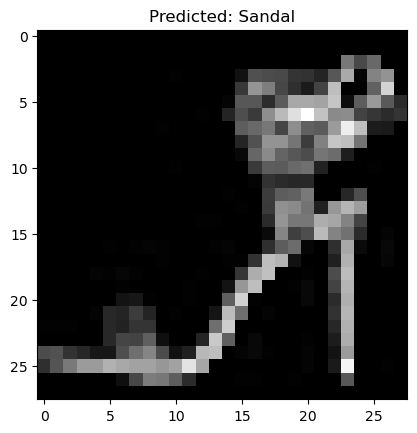

In [37]:
# Display the chosen image and overlay with the model's predicted class.

# Display the selected image
plt.imshow(test_img.reshape(28, 28), cmap='gray')
 
# Predict the class of the image using the loaded model
predictions = loaded_model.predict(test_img.reshape(1, 28, 28, 1))
predicted_class = np.argmax(predictions)
 
# Add the predicted class as the title
plt.title(f"Predicted: {class_names[predicted_class]}")
 
# Show the image with the prediction
plt.show()